In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
t_data = np.array([-2, -1, 0, 1, 2])
y_data = np.array([2, -10, 0, 2, 1])

In [107]:
def f(x):
    return np.sum((x[0] + x[1]*t_data + x[2]*t_data**2 - y_data)**2)

def grad_f(x):
    residuals = x[0] + x[1]*t_data + x[2]*t_data**2 - y_data
    grad = np.array([
        np.sum(2 * residuals),
        np.sum(2 * residuals * t_data),
        np.sum(2 * residuals * t_data**2)
    ])
    return grad

def hessian_f(x):
    H = np.array([
        [t_data.size, np.sum(t_data), np.sum(t_data**2)],
        [np.sum(t_data), np.sum(t_data**2), np.sum(t_data**3)],
        [np.sum(t_data**2), np.sum(t_data**3), np.sum(t_data**4)]
    ]) * 2
    return H

In [108]:
def bisection_step_size(x, gradient):
    direction = -gradient
    alpha_lower = 0
    alpha_upper = 1
    epsilon = 1e-6
    while alpha_upper - alpha_lower > epsilon:
        alpha = (alpha_lower + alpha_upper) / 2
        h_prime_alpha = np.dot(grad_f(x + alpha * direction), direction)
        if h_prime_alpha < 0:
            alpha_lower = alpha
        else:
            alpha_upper = alpha
    return (alpha_lower + alpha_upper) / 2

In [109]:
def steepest_descent_bisection(x, tol=1e-6, max_iter=100):
    costs = [f(x)]
    x_history = [x]

    for i in range(max_iter):
        grad = grad_f(x)
        lr = bisection_step_size(x, grad)  # You already have this function
        x_new = x - lr * grad
        costs.append(f(x_new))
        x_history.append(x_new)
        x = x_new
        
        if np.linalg.norm(grad) < tol:
            break
        
    return x, costs, x_history


def newtons_method(x0, tol=1e-6, max_iter=100):
    x = x0
    lr = 0.1
    costs = [f(x)]
    x_history = [x]
    
    for _ in range(max_iter):
        gradient = grad_f(x)
        H = hessian_f(x)

        x = x - lr * np.linalg.inv(H) @ gradient
        costs.append(f(x))
        x_history.append(x)
        
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, costs, x_history

In [110]:
x0 = np.array([2, 4, 1])

optimal_coefficients_sd, costs_sd, x_history_sd = steepest_descent_bisection(x0)
optimal_coefficients_nr, costs_nr, x_history_nr = newtons_method(x0)

In [111]:
print(optimal_coefficients_sd)
print(optimal_coefficients_nr)

[-2.99996419  1.          0.99999181]
[-2.99986719  1.00007968  1.        ]


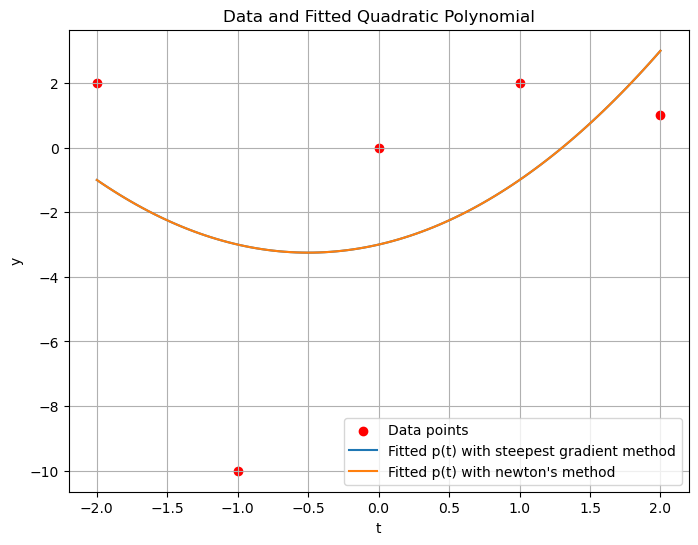

In [112]:
p1 = np.poly1d(optimal_coefficients_sd[::-1]) 
p2 = np.poly1d(optimal_coefficients_nr[::-1])

t_vals = np.linspace(t_data.min(), t_data.max(), 100)
y1_vals = p1(t_vals)
y2_vals = p2(t_vals)

plt.figure(figsize=(8, 6))
plt.scatter(t_data, y_data, color='red', label='Data points')
plt.plot(t_vals, y1_vals, label='Fitted p(t) with steepest gradient method')
plt.plot(t_vals, y2_vals, label='Fitted p(t) with newton\'s method')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title('Data and Fitted Quadratic Polynomial')
plt.grid(True)
plt.savefig("Images/PartA_2_quadratic.pdf")
plt.show()

### Error for differnet polynomial terms 

Could not figure out how to calculate the grad and hessian for arbitrary k terms of polynomial myself. Took help from chatgpt to compute grad_f and hessian_f.

In [113]:
def f(x, t=t, y=y):
    y_pred = np.polyval(x, t)
    return np.sum((y - y_pred) ** 2)

def grad_f(x, t=t, y=y):
    # Gradient of a polynomial fitting function can be computed analytically or via numerical methods
    # Here we'll use a simple numerical gradient approximation
    epsilon = 1e-6
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (f(x_plus, t, y) - f(x_minus, t, y)) / (2 * epsilon)
    return grad

def hessian_f(x, t=t, y=y):
    epsilon = 1e-6
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ijp = x.copy()
            x_ijm = x.copy()
            x_ijp[i] += epsilon
            x_ijp[j] += epsilon
            x_ijm[i] -= epsilon
            x_ijm[j] -= epsilon
            H[i, j] = (f(x_ijp, t, y) - 2*f(x, t, y) + f(x_ijm, t, y)) / (epsilon**2)
    return H

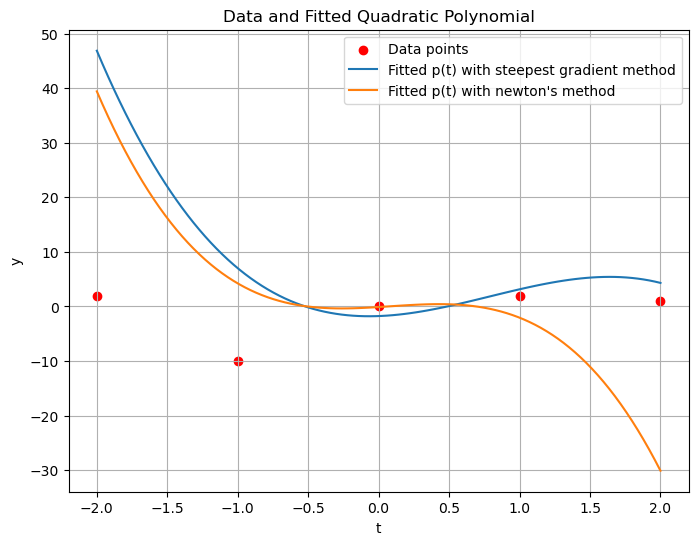

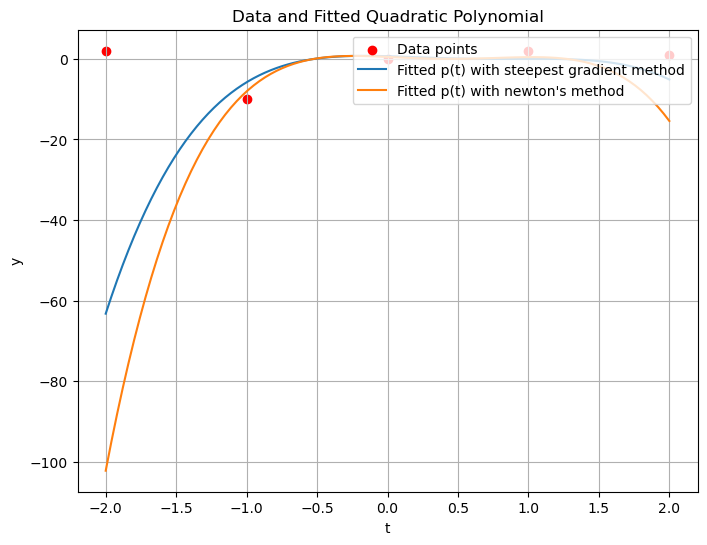

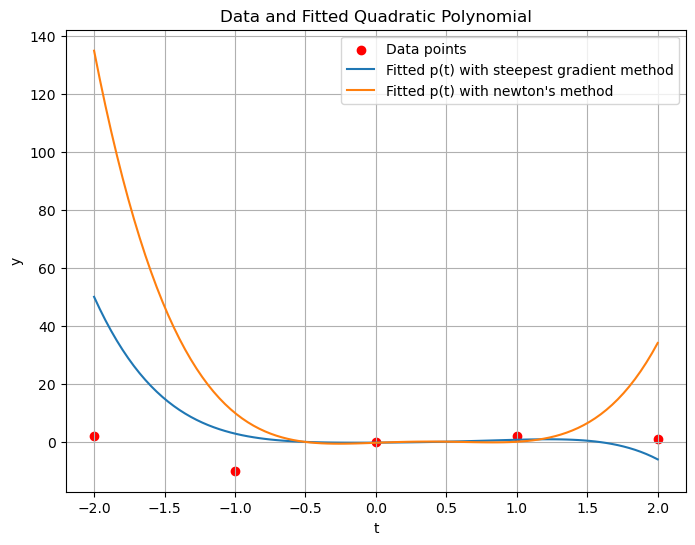

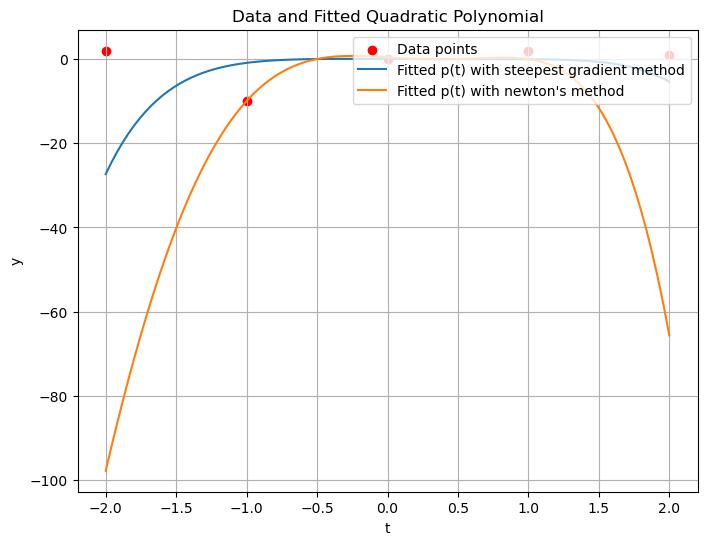

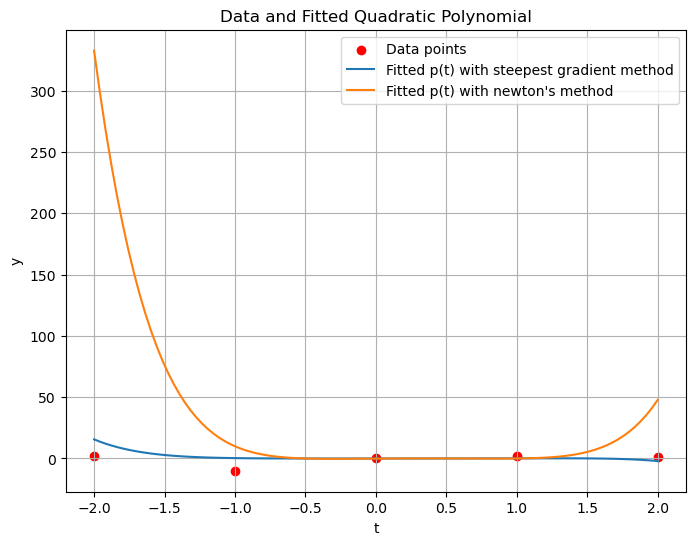

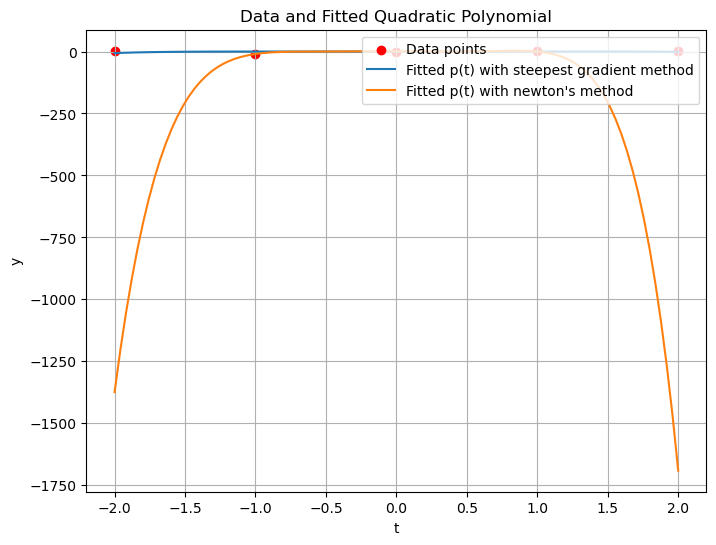

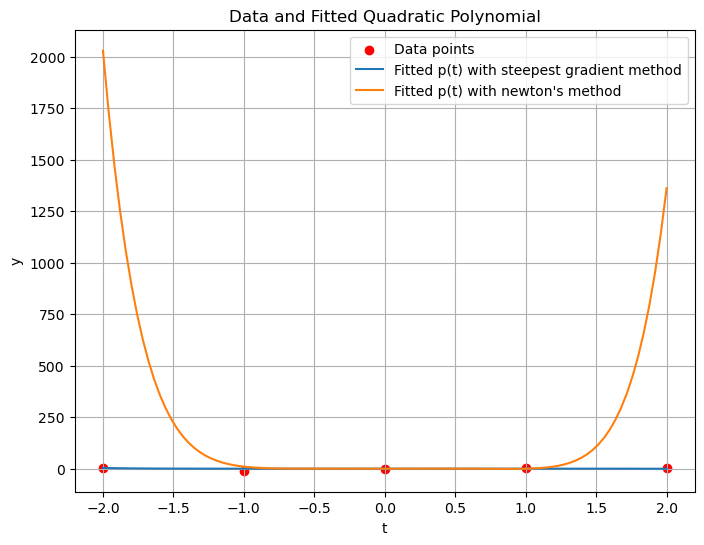

In [117]:
max_degree = 9  # We will fit polynomials up to degree 10
errors_steepest_descent = []
errors_newtons_method = []

for degree in range(3, max_degree + 1):
    x0 = np.zeros(degree + 1)
    
    # Steepest descent method
    optimal_params_sd, costs_sd, history_sd = steepest_descent_bisection(x0)
    errors_steepest_descent.append(costs_sd[-1])
    
    # Newton's method
    optimal_params_nm, costs_nm, history_nm = newtons_method(x0)
    errors_newtons_method.append(costs_nm[-1])

    p1 = np.poly1d(optimal_params_sd[::-1]) 
    p2 = np.poly1d(optimal_params_nm[::-1])
    
    t_vals = np.linspace(t_data.min(), t_data.max(), 100)
    y1_vals = p1(t_vals)
    y2_vals = p2(t_vals)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(t_data, y_data, color='red', label='Data points')
    plt.plot(t_vals, y1_vals, label='Fitted p(t) with steepest gradient method')
    plt.plot(t_vals, y2_vals, label='Fitted p(t) with newton\'s method')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(loc='upper right')
    plt.title('Data and Fitted Quadratic Polynomial')
    plt.grid(True)
    plt.show()

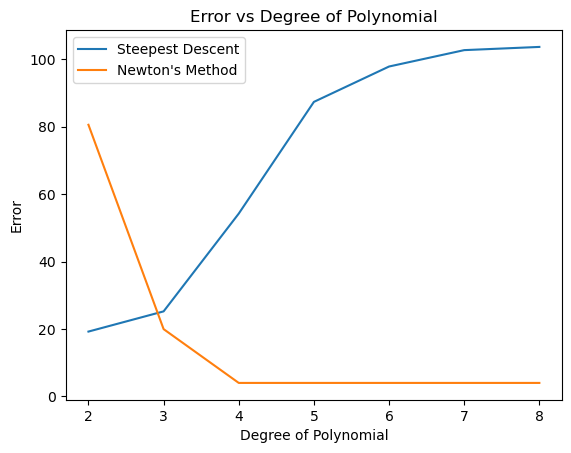

In [115]:
degrees = np.arange(2, max_degree)
plt.plot(degrees, errors_steepest_descent, label='Steepest Descent')
plt.plot(degrees, errors_newtons_method, label="Newton's Method")
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Error vs Degree of Polynomial')
plt.legend()
plt.savefig("Images/Part_A_Error vs K.pdf")
plt.show()